In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# IMPORTING DATASET
data=pd.read_csv('Fraud_Check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
x = data['Taxable.Income']
def risky(x):
    status=[]
    for i in x:
        if i<=30000:
            status.append('risky')
        elif i >30000:
            status.append('Good') 
    return status

In [7]:
fraud_status = pd.DataFrame(risky(x),columns=['status'])
fraud_status

,status
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [9]:
data['Status']= fraud_status

In [10]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:
le= preprocessing.LabelEncoder()
X= data.iloc[:,0:6]
Y= data.iloc[:,6]
X['Undergrad'] = le.fit_transform(X['Undergrad'])
X['Marital.Status'] = le.fit_transform(X['Marital.Status'])
X['Urban'] = le.fit_transform(X['Urban'])

In [12]:
X.drop('Taxable.Income',axis=1,inplace=True)

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=44)

In [14]:
# BUILDING MODEL ON BASIS OF ENTROPY
model_entropy= DecisionTreeClassifier(criterion='entropy',max_depth=8)
model_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

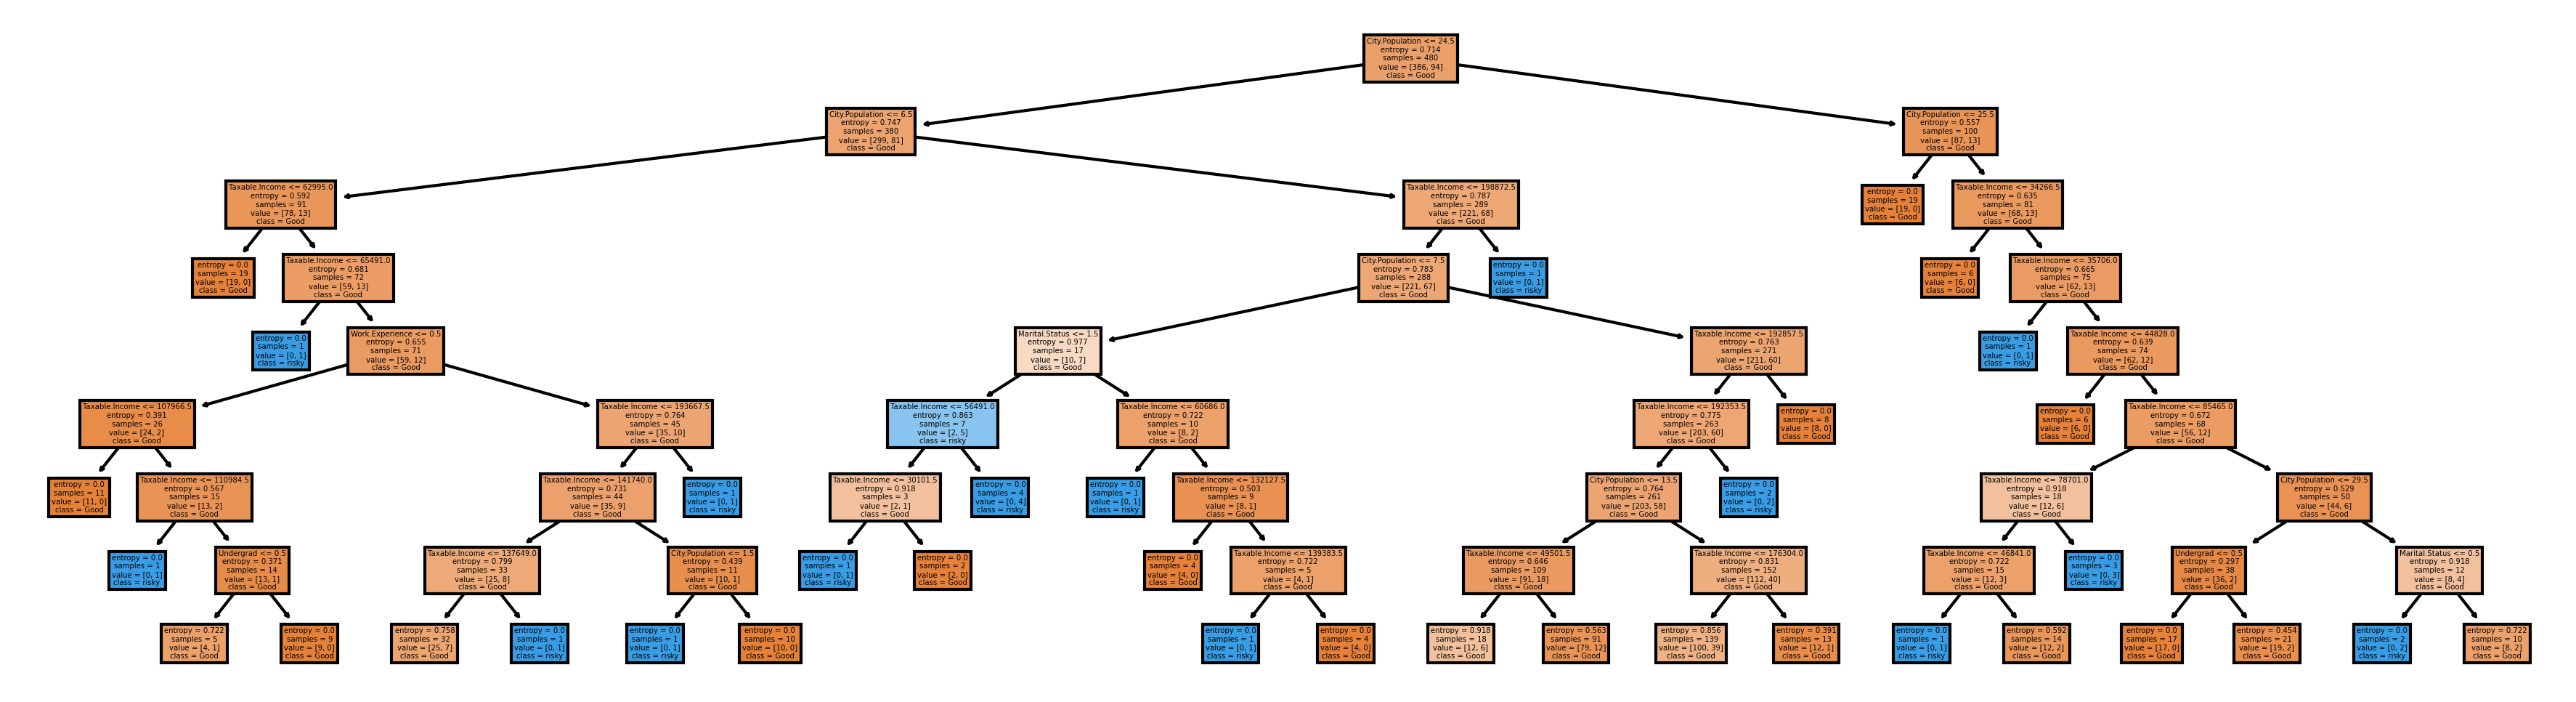

In [17]:
# VISUALIZING THE TREE
features=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
classes=['Good','risky']
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,4), dpi=300)
tree.plot_tree(model_entropy,feature_names=features,class_names=classes,filled=True);

In [21]:
pred_test=model_entropy.predict(X_test)
pred_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'risky', 'Good',
       'Good', 'Good', 'Good', 'risky', 'Good', 'Good', 'risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',


In [22]:
pd.crosstab(Y_test,pred_test)

col_0,Good,risky
Status,,
Good,85,5
risky,29,1


In [23]:
# ACCURACY OF MODEL
np.mean(pred_test==Y_test)

0.7166666666666667

In [24]:
# BUILDING MODEL ON BASIS OF GINI INDEXING
model_gini= DecisionTreeClassifier(criterion='gini',max_depth=8)
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=8)

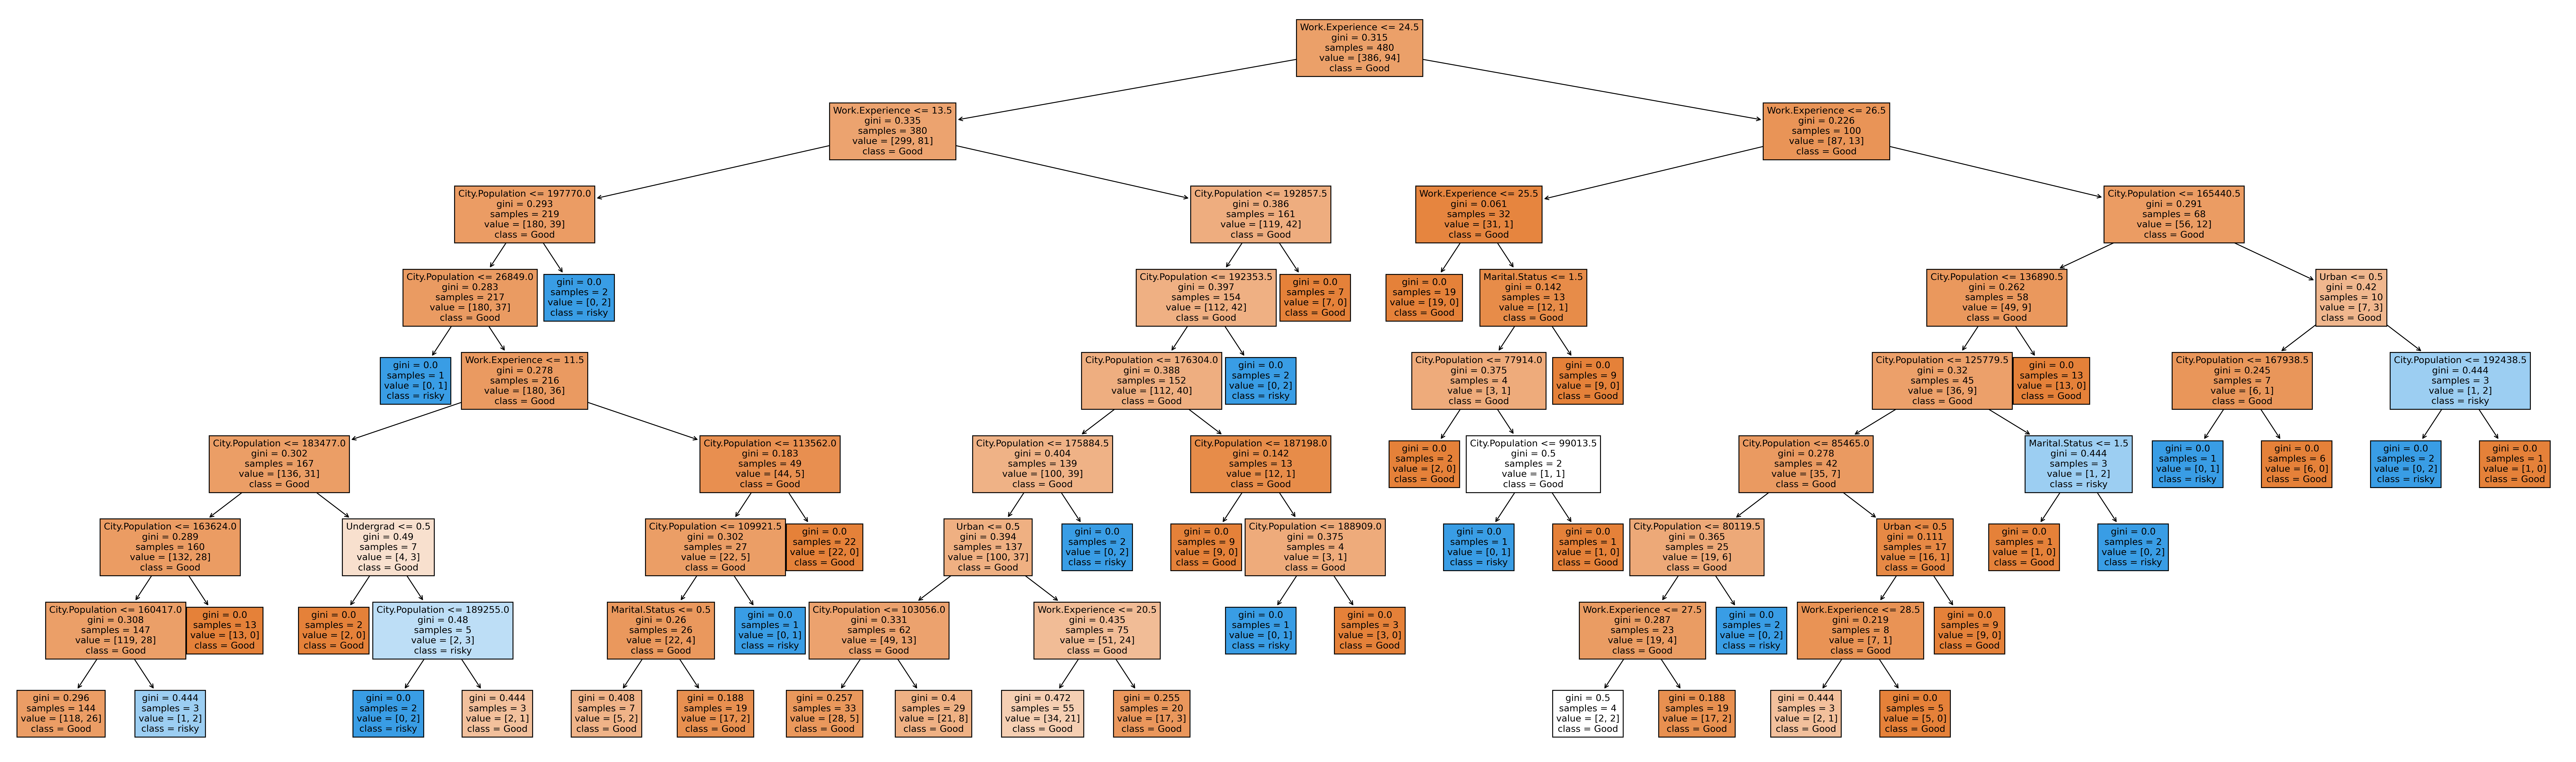

In [27]:
# VISUALIZING THE TREE
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,15), dpi=300)
tree.plot_tree(model_gini,filled=True,feature_names=X_train.columns,class_names=Y_train.unique(),fontsize=10);

In [26]:
preds_test=model_gini.predict(X_test)
preds_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'risky', 'Good', 'Good', 'Good', 'risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
  

In [28]:
pd.crosstab(preds_test,Y_test)

Status,Good,risky
row_0,,
Good,87,28
risky,3,2


In [29]:
np.mean(preds_test==Y_test)

0.7416666666666667